# Discussion 3 - Value at Risk

## FINM 36700: Portfolio and Risk Management

### Mark Hendricks

#### Autumn 2023

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

from sklearn.linear_model import LinearRegression
import sys
sys.path.insert(0,'../cmds')
from portfolio import *
from risk import *

In [2]:
LOADFILE = '../data/risk_etf_data.xlsx'
info = pd.read_excel(LOADFILE,sheet_name='descriptions').set_index('ticker')
rets = pd.read_excel(LOADFILE,sheet_name='total returns').set_index('Date')
prices = pd.read_excel(LOADFILE,sheet_name='prices').set_index('Date')

FREQ = 252

$$\newcommand{\E}{E}$$
$$\newcommand{\rbar}{\bar{r}}$$
$$\newcommand{\rvec}{\boldsymbol{r}}$$
$$\newcommand{\rvecbar}{\boldsymbol{\bar{r}}}$$

$$\newcommand{\Ntime}{N}$$
$$\newcommand{\Nt}{N}$$

$$\newcommand{\rmat}{\boldsymbol{R}}$$

$$\newcommand{\riskmeasure}{\varrho}$$

$$\newcommand{\wt}{w}$$

$$\newcommand{\Nassets}{K}$$

$$\newcommand{\muvec}{\boldsymbol{\mu}}$$

$$\newcommand{\onevecNt}{\boldsymbol{1}_{\Ntime\times 1}}$$

$$\newcommand{\covest}{\hat{\boldsymbol{\Sigma}}}$$

$$\newcommand{\meanest}{\hat{\mu}}$$

$$\newcommand{\meanestvec}{\hat{\boldsymbol{\mu}}}$$

$$\newcommand{\covmat}{\boldsymbol{\Sigma}}$$

$$\newcommand{\rf}{r_f}$$

$$\newcommand{\VaR}{\text{VaR}}$$
$$\newcommand{\VaRqtau}{\VaR_{q,\tau}}$$
$$\newcommand{\pnlVaR}{\pnl^{\VaR}}$$
$$\newcommand{\pnlVaRqtau}{\pnl^{\VaR_{q,\tau}}}$$
$$\newcommand{\rVaR}{r^{\VaR}}$$
$$\newcommand{\rVaRqtau}{r^{\VaR_{q,\tau}}}$$
$$\newcommand{\loss}{L}$$

$$\newcommand{\Pr}{\mathbb{P}}$$

$$\newcommand{\quant}{q}$$
$$\newcommand{\port}{\Pi}$$
$$\newcommand{\pnl}{\Gamma}$$

$$\newcommand{\cdf}{\Phi}$$
$$\newcommand{\pdf}{\phi}$$

$$\newcommand{\zscore}{\texttt{z}}$$

$$\newcommand{\cdfz}{\cdf_{\zscore}}$$
$$\newcommand{\pdfz}{\pdf_{\zscore}}$$

$$\newcommand{\rlog}{\texttt{r}}$$

$$\newcommand{CVaR}{\text{CVaR}}$$
$$\newcommand{CVaRqtau}{\CVaR_{q,\tau}}$$
$$\newcommand{\pnlCVaR}{\pnl^\CVaR}$$
$$\newcommand{\pnlCVaRqtau}{\pnl^{\CVaR_{q,\tau}}}$$
$$\newcommand{\rCVaR}{r^\CVaR}$$
$$\newcommand{\rCVaRqtau}{r^{\CVaR_{q,\tau}}}$$

# Value at Risk (VaR)

## Definition

The **Value-at-Risk (VaR)** is simply a quantile of the distribution.

The $\tau$-day, $\quant$ quantile VaR of an asset or portfolio is defined as $\pnlVaRqtau$ such that 

$$\Pr\left(\pnl_{t,t+\tau} \le \pnlVaRqtau_t\right) = \quant$$

where $\pnl$ is the **dollar** amount of the pnl

$$\pnl = \port_{t+\tau}-\port_t$$

and $\port$ is the value of the portfolio.

This says that...
* there is a probability of $\quant$
* that over a horizon of $\tau$ days
* the portfolio PnL will be less than$\pnlVaRqtau$.

$$\Pr\left(\loss_{t,t+\tau} > L^{\VaRqtau}\right)  = \quant$$

### Returns
It is often useful to discuss the $\VaR$ return, $\rVaRqtau$:

$$\Pr\left(r_{t,t+\tau} \le \rVaRqtau_t\right) = \quant$$

Note that

$$\pnlVaRqtau_t = \rVaRqtau_t\, \port_t$$


### Profits versus Losses, 
Our definitions above imply that $\pnlVaRqtau$ and $\rVaRqtau$ will be negative numbers (for all interesting cases.)

Be careful to note that the $\VaR$ may be defined with respect to 
* Left tail of profit, $\pnl$
* Right tail of losses, (a positive number,) $\loss = -\pnl$$

Below, the notation will focus on returns and PnL. 
* However, when discussing VaR, we will often focus on the absolute value.
* This is a reason that some references will focus on losses, $L$, to get a positive value for VaR.

## Distribution

If $\pnl$ has a cumulative density function (cdf) that is
* continuous
* strictly increasing 
then we can simply write:

$$\pnlVaRqtau = \cdf_{\pnl}^{-1}(\quant)$$

where $\cdf_{\pnl}$ denotes the (unspecified) cdf of returns, and $\cdf^{-1}_{\pnl}$ is its inverse.

Similarly, we have

$$\rVaRqtau = \cdf_r^{-1}(\quant)$$


#### Technical Note

If the distribution of returns (profits) does not have such a cdf, then we need a more general definition,

$$\pnlVaRqtau = \sup\left\{\pnl\; |\; \cdf_{\pnl}(\pnl)\le \quant\right\}$$

Similarly for returns, $\rVaRqtau$. 

## Normal Distribution

$\VaR$ will often be modeled using a **normal distribution**.
* This may seem strange given the evidence we saw yesterday that returns are not normally distributed--especially for the tails!
* Serious risk management would not rely on a normal distribution in most cases.
* But the **normal** $\VaR$ formulas are--if nothing else--an important way to quote and compare $\VaR$.

Suppose that profits and returns are normally distributed. Focusing on returns,

$$r_{t,t+\tau} \sim \mathcal{N}\left(\mu_\tau,\sigma_\tau^2\right)$$

where the subscript $\tau$ is a reminder that the mean and variance depend on the return horizon, $\tau$.

### Normal Formula
Then from the results above, we immediately have

$$\rVaRqtau = \mu_\tau + \zscore_\quant\sigma_\tau$$

where $\zscore_\quant$ is the value (z-score) of the standard normal cdf associated with quantile $q$. That is, if $\cdfz$ denotes the standard normal cdf, then

$$\cdfz(\zscore_\quant)=\quant$$

Note that this formula for $\rVaRqtau$ immediately gives us $\pnlVaRqtau$, recalling that

$$\pnlVaRqtau_t = \rVaRqtau_t\, \port_t$$

## Lognormal

Suppose that prices are lognormal, so that **log returns** are normal with a one-period mean of $\mu$ and one-period variance of $\sigma^2$. 

Then we have the following formula for the $\tau$ horizon,

$$\rlog_{t,t+\tau} \sim \mathcal{N}\left(\tau\mu,\tau\sigma^2\right)$$


If we additionally assume
* log returns are iid 
* log return mean, $\mu$ is zero.

then we get the result that $\rlog^{\VaR}$ scales with the square root of the horizon:

$$\rlog^{\VaRqtau} = \sqrt{\tau}\rlog^{\VaR_{q,1}}$$

### Punchline
This formula is widely used as a **convention**, even though...
* returns are not iid! (And typically the modeling within VaR will recognize that.)
* mean is not zero
* we typically use returns, not log returns!

Thus, for any $\VaR$, (profits, returns, log returns,) you'll typically see 

**$\VaR$ compounding with the square root of the horizon.**

#### Technical Point

We could use log returns, but it would require a different formula for $\VaR$ profits, and these would no longer be normally distributed.

$$\pnlVaRqtau = \port_t\left[\exp\left\{\tau\mu + \zscore_q\sqrt{\sigma}\right\}-1\right]$$

# Conditional Value-at-Risk (CVaR)

## Definition

**Conditional VaR (CVaR)**, also widely known as **Expected Shortfall (ES)** is the expected value conditional on being less than the $\VaR$ threshold.

$$\pnlCVaRqtau = \E\left[\pnl_{t,t+\tau}\, |\, \pnl_{t,t+\tau} < \pnlVaRqtau\right]$$

$$\rCVaRqtau = \E\left[r_{t,t+\tau}\, |\, r_{t,t+\tau} < \rVaRqtau\right]$$

$$\pnlCVaRqtau_t = \rCVaRqtau_t \port_t$$

## Normal Distribution

Suppose we continue with the normal distribution of returns from above.

The $\CVaR$ is the conditional expectation of a normal distribution, which gives us the following:

$$\rCVaRqtau_t =\;  \mu_{\tau,t} - \frac{\pdfz(\zscore_\quant)}{\quant}\sigma_{\tau,t}$$

### Technical Point

We get the closed-form solution for $\CVaR$ from an well-known result about the **truncated normal** distribution. That is to say, the conditional expectation of a normal distribution.

* Consider a standard normal, $\zscore$
* Let $\pdfz$ denote the **pdf** of the standard normal.

It is well known that for any threshold, $a$, 

$$\E\left[\zscore\, |\, \zscore < a\right] = -\frac{\pdfz(a)}{\cdfz(a)}$$

## Sufficient Statistics of a Normal

Note the similarity between the formulas for $\VaR$ and $\CVaR$ when assuming a normal distribution:

$$\rVaRqtau = \mu_{\tau,t} + \underbrace{\zscore_\quant}\sigma_{\tau,t}$$


$$\rCVaRqtau = \mu_{\tau,t} + \underbrace{-\frac{\pdf_\zscore\left(\zscore_\quant\right)}{\quant}}\sigma_{\tau,t}$$

This is not a surprise.
* The normal distribution is completely characterized by its mean and variance.
* That is, these two parameters are **sufficient statistics** for a normal variable.
* **Any** statistic of a normal distribution can be rewritten as a function of $\mu$ and $\sigma$.

#### Rescaled volatility

Thus, $\VaR$, $\CVaR$, etc are all just rescalings of volatility if we are using a normal model.

In some sense, this is what **normal $\VaR$** is really about--having a scaled volatility.

# Coherence

Is $\VaR$ a **coherent** risk measure?

No. In general, it is not subadditive.

## Examples

### Payoffs

Consider the payoff outcomes for $\pnl_i$ and $\pnl_j$ across 5 potential states of the world:
$$\pnl_i \in \begin{bmatrix}-2\\-1\\0\\1\\2\end{bmatrix}, \hspace{1cm} \pnl_j \in \begin{bmatrix}-1\\-2\\0\\1\\2\end{bmatrix}$$

The states are ordered, such that in state $s$, both securities deliver the payoff in row $s$ of their respective arrays.

Consider a portfolio payoff that is the sum of the two: $\pnl_p = \pnl_i + \pnl_j$.

What is
$$\pnl_i^{\VaR_{.2}}, \hspace{1cm}, \pnl_j^{\VaR_{.2}}, \hspace{1cm} \pnl_i^{\VaR_{.2}} + \pnl_j^{\VaR_{.2}}, \hspace{1cm} \pnl_p^{\VaR_{.2}}$$

### Example: Returns Not Subadditive
Suppose there are 100 potential outcomes ("states").
* We have two assets, $r_i$ and $r_j$.
* In almost every state, the return is simply 
$$r_{s,i}=r_{s,j} = \frac{s-50}{100}$$
* The only exception is
$$r_{i,(5)} = -.45, r_{j,(5)} = -.46\$$

$$r_{i,(4)} = -.46, r_{j,(4)} = -.45\$$

Then for each return individually,

$$r_i^{\VaR_{.05}} = -.45 = r_j^{\VaR_{.05}}$$

Yet for the equal-weighted portfolio, $r_p = .5r_i + r_j$,

$$r_p^{\VaR_{.05}} = -.455$$

### Issue

The VaR is sensitive to the ordering around the specified quantile.
* If two series do not share the timing of the returns around the $\quant$ threshold may happen. 
* For instance, suppose we are looking at the worst-case scenario, and their worst and second-worst dates are swapped.

### Callback

We already saw this was the case with SPY and UPRO across 2017-2022!

## Normal VaR

Is **Normal VaR** coherent?

## CVaR

Is CVaR coherent?
* For a normal distribution?
* For the examples above?

# Conditional Moments

Whether using a normal model or something else, we want to allow $\VaR$ to be dynamic across time. That is, we want the **conditional** $\VaR$, utilizing info up to time $t$.

For **normal** $\VaR$ this means having a dynamic model of the volatility.

As mentioned earlier, we typically want conditional versions of any of our risk statistics, so we have broader reasons to want conditional volatility rather than unconditional volatility.

## The mean

It will be typical to ignore the mean in the following calculations.

Thus, the formulas calculate the second moment rather than the **centered** second moment.

#### Why do you think this convention is often used?

### Model for the mean
And note, there is nothing wrong with including the estimated mean in the formulas below (and adjusting the degrees of freedom.)

If using a model for the mean, consider $r$ in the formulas below as the residual after demeaning.

## Notation for the volatility estimates

Below, we use the notation that $\sigma_t^2$ is estimated using data through $t-1$ as an estimate of what variance will be the next period ($t$).

## Expanding

$$\sigma^2_t = \frac{1}{t-1}\sum_{i=1}^{t-1}r^2_i$$

## Rolling

$$\sigma^2_t = \frac{1}{m}\sum_{i=1}^mr^2_{t-i}$$

## EWMA 
The **exponential weighted moving average (EWMA)** puts more weight on more recent data by setting a geometric decay parameter, $\lambda\in [0, 1]$. (Typically $\lambda$ will be in $(.9,1)$.

$$\sigma^2_t = \sum_{i=1}^{\Nt-1} \lambda^{(i-1)} r^2_{t-i}$$

## IGARCH

$$\sigma^2_t = \lambda\sigma^2_{t-1} + (1-\lambda)r^2_{t-1}$$

Note that **in the limit** this is the same as 

## GARCH

$$\sigma^2_t = \alpha_0 + \gamma_1\sigma^2_{t-1} + \alpha_1 r^2_{t-1}$$

GARCH looks a lot like EWMA, but note that
* the parameters do not need to sum to 1
* it could be expanded to take lags of $r$ or $\sigma$, which would be a GARCH(2,1), GARCH(1,2), etc.

# Evaluating VaR

The Hit Test is a common way of backtesting a VaR methodology.
* It checks historically what the daily VaR would have been, given the information known at that time. It compares this to the actual performance for the day.
* If the VaR is working well, then the day-t loss should only exceed the day-$t$ $\pnl^{\VaR_{\quant,1}}$ with a probability of $\quant.$
* But what if future market environment is very different than past environment with which fit test was run? Many VaR models looked okay before the 2007-2008 crisis hit!

In [3]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

import sys
sys.path.insert(0,'../cmds')
from portfolio import *
from risk import *

In [4]:
LOADETF = '../data/risk_etf_data.xlsx'
px = pd.read_excel(LOADETF,sheet_name='prices').set_index('Date').dropna()

rets = px.pct_change().dropna()

FREQ = 252
WINDOW = 60

QUANTILE = .05
mu = 0

In [5]:
METHODS = ['empirical cdf','expanding vol','rolling vol']

sigma_expanding = rets.expanding(WINDOW).std()
sigma_rolling = rets.rolling(WINDOW).std()
sigma = pd.concat([None,sigma_expanding,sigma_rolling],axis=1,keys=METHODS)

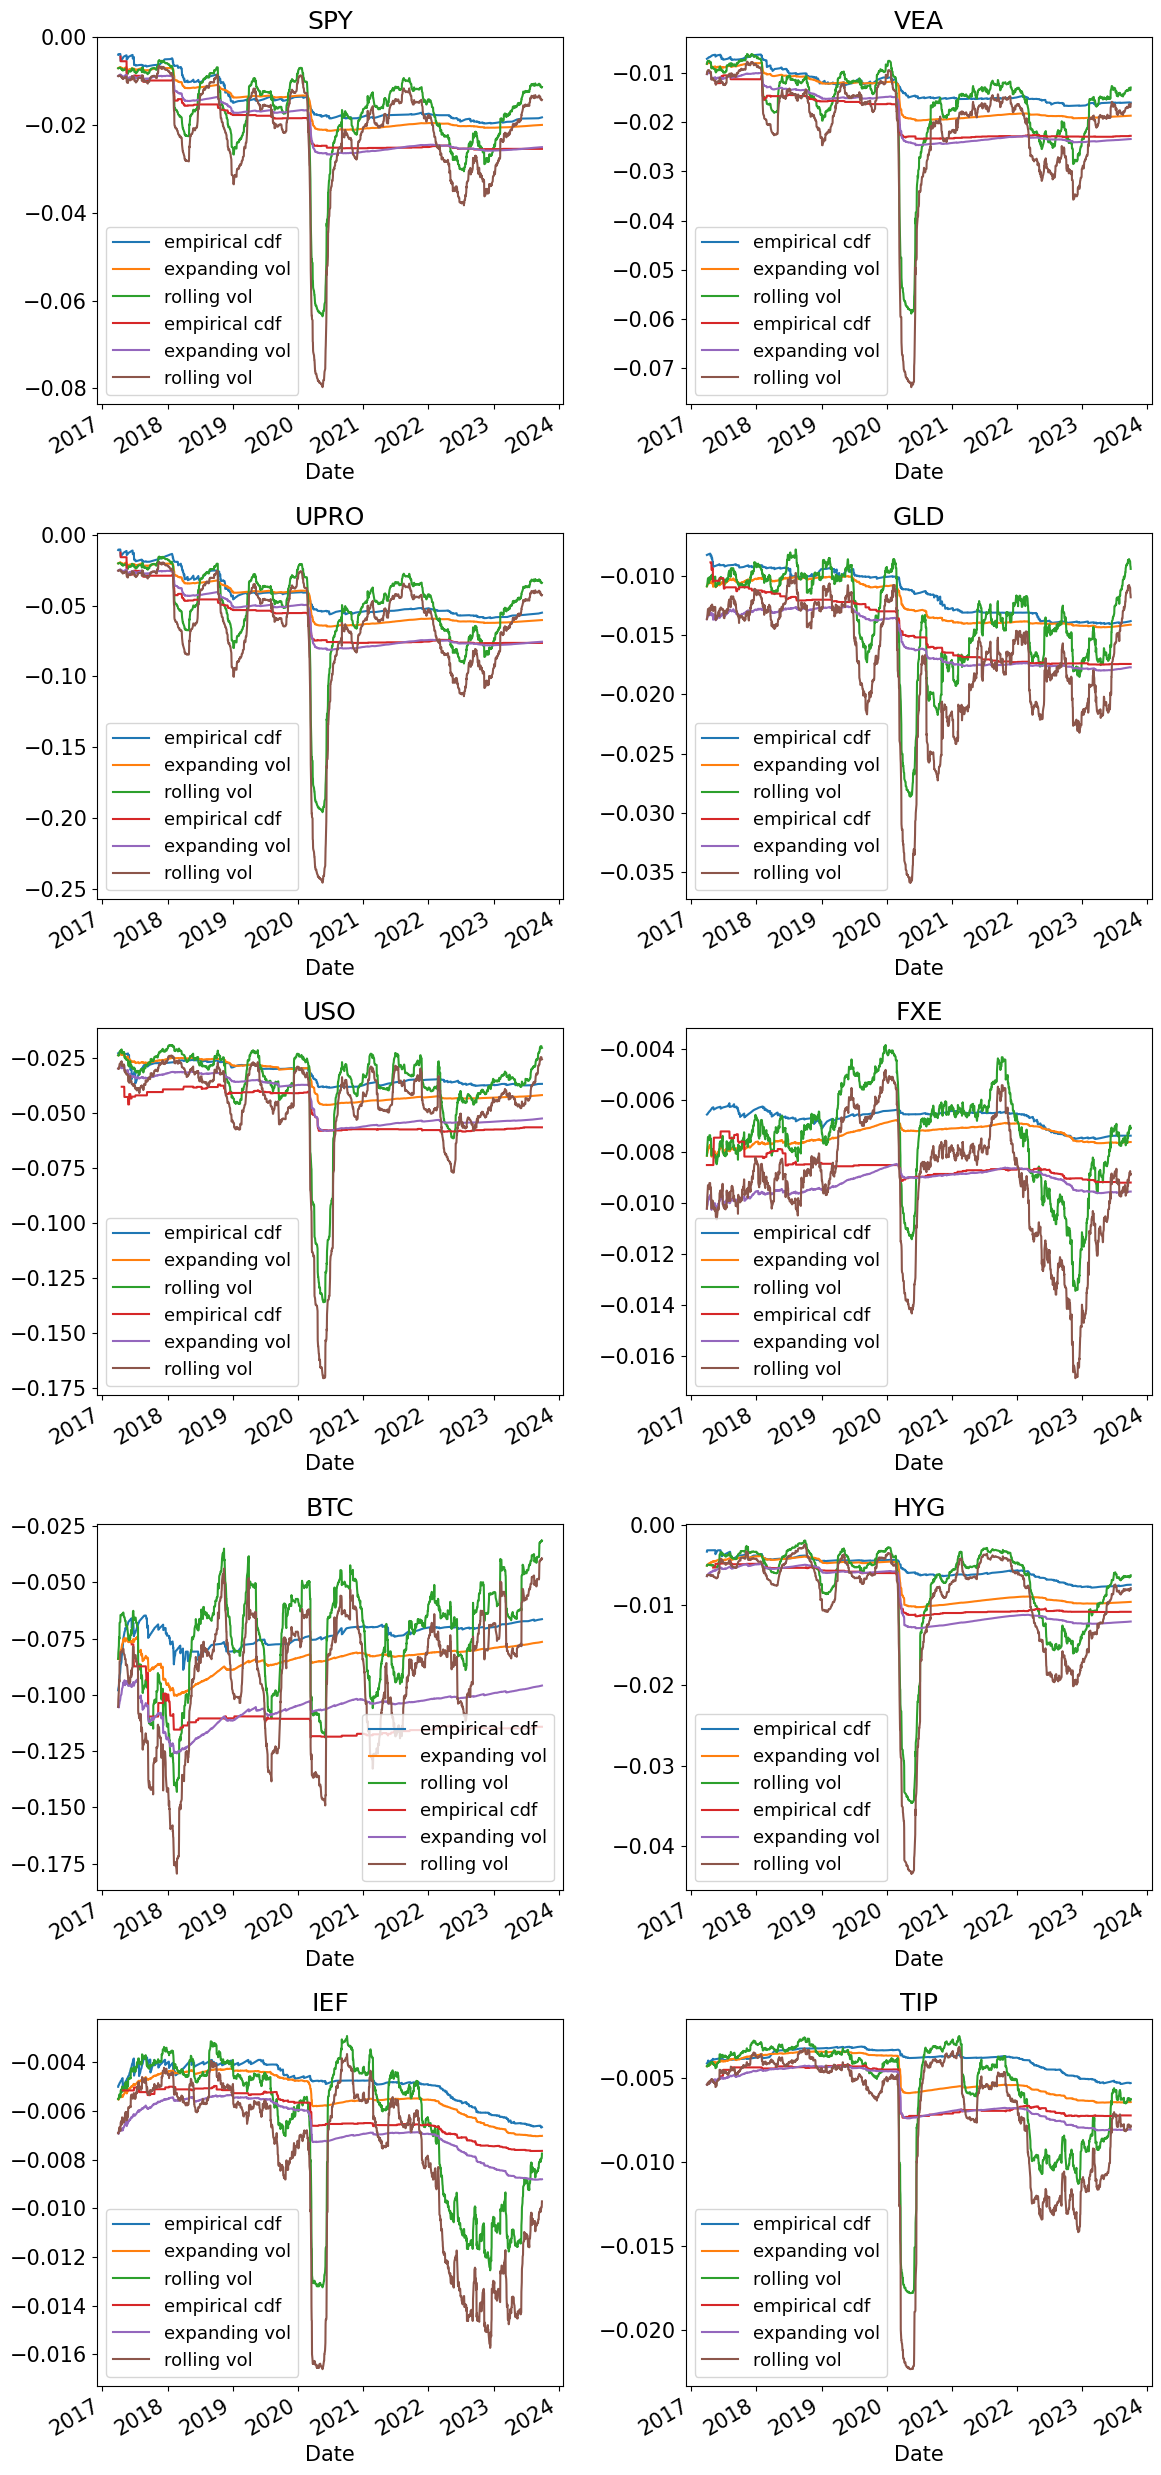

In [ ]:
from scipy.stats import norm
zscore = norm.ppf(QUANTILE)

VaRret = dict()
CVaRret = dict()

VaRret[METHODS[0]] = rets.expanding(WINDOW).quantile(QUANTILE)
CVaRret[METHODS[0]] = rets[rets<VaRret[METHODS[0]]].expanding().mean()

for method in METHODS[1:]:
    VaRret[method] = mu + zscore * sigma[method]
    CVaRret[method] = mu - norm.pdf(zscore)/QUANTILE * sigma[method]

VaRret = pd.concat(VaRret,axis=1)
CVaRret = pd.concat(CVaRret,axis=1)

fig, ax = plt.subplots(5,2,figsize=(12,25))
for i,tick in enumerate(rets.columns[0:-1]):
    indax = [int(np.floor(i/2)),i%2]
    VaRret.swaplevel(axis=1)[tick].plot(ax=ax[indax[0],indax[1]],title=f'{tick}')
    CVaRret.swaplevel(axis=1)[tick].plot(ax=ax[indax[0],indax[1]],title=f'{tick}')
    
plt.tight_layout()

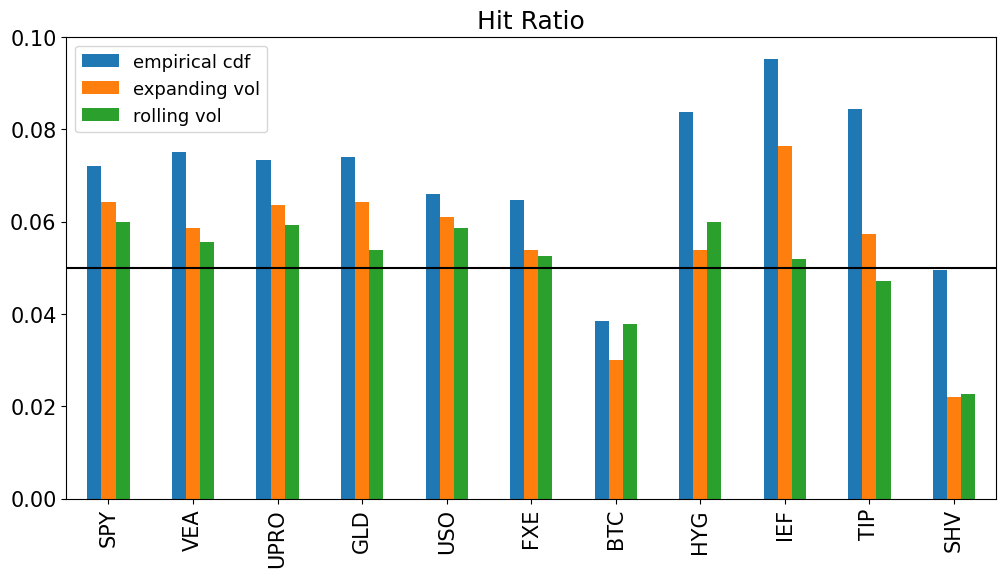

In [7]:
hits = dict()
for method in METHODS:
    hits[method] = rets < VaRret[method].shift()
    
hits = pd.concat(hits,axis=1)

hitratio = hits.sum().to_frame().unstack().T.droplevel(0)
hitratio /= VaRret.dropna().shape[0]
hitratio.plot.bar();
plt.axhline(QUANTILE,color='k')
plt.title('Hit Ratio')
plt.show()

In [8]:
sum_sq_errors = ((hitratio-QUANTILE)**2).sum().to_frame('hit ratio errors')
sum_sq_errors.style.format('{:.2%}')

,hit ratio errors
empirical cdf,0.72%
expanding vol,0.27%
rolling vol,0.13%


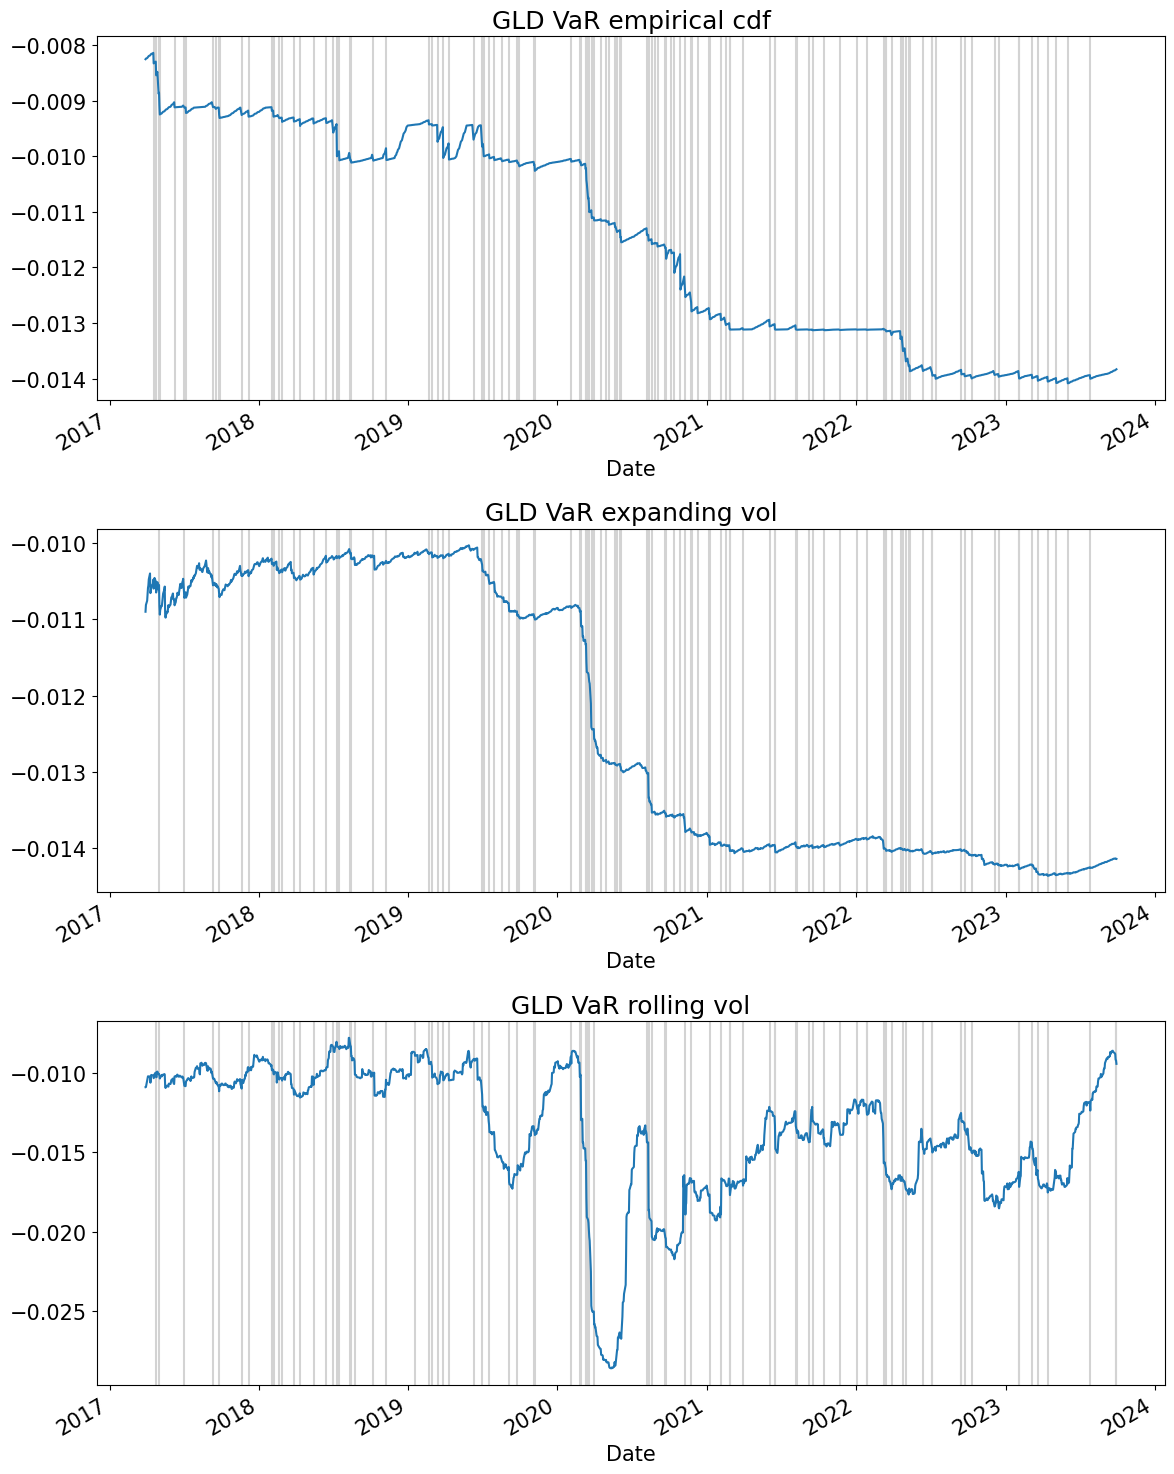

In [9]:
tick = 'GLD'

fig, ax = plt.subplots(len(METHODS),1,figsize=(12,15))

for i,method in enumerate(METHODS):
    VaRret[method][tick].plot(ax=ax[i],title=f'{tick} VaR {method}')
    for xval in rets.index[hits.swaplevel(axis=1)[tick][method]]:
        ax[i].axvline(x=xval,color='lightgray', zorder=0)
    
plt.tight_layout()
plt.show()

# Simulation

## Historic Simulation (Empirical CDF)

Historical simulation is one of the simplest and most widely used approaches to calculating VaR.
- The historical simulation does not assume normally distributed losses.
- However, it is an unconditional VaR, in that it assumes independent observations.
- It takes the cdf of losses from the histogram of past losses.

Calculate the $\VaR$ as the empirical quantile, exactly as discussed earlier.

### CVaR

Obtain the $\CVaR$ again using the order statistics to build the cdf:

$$r^{\CVaR_{\quant,1}} = \frac{1}{\quant\Ntime}\sum_{i=1}^{\quant\Ntime}r_{(i)}$$

This is just the sample mean of the left tail of the empirical cdf.

## Advantages of Historical Simulation

Advantages of historical simulation
This approach estimates a cdf of losses nonparametrically by assuming the subsample frequency reflects the actual probabilities.
* Thus, the estimated cdf can have any shape, based on the historic observations.
* The two main advantages here are the ease of implementation and the flexibility in not assuming a probability distribution, (such as the normal,) ex-ante.

## Disadvantages of Historical Simulation

### Statistical Power
The VaR depends on having a good estimate of the tail of the distribution.
- If the sample size, N, is small, then there will be large standard errors on the order statistic. (The standard errors shrink by the square root of the sample size.)
- If stress-testing extreme market conditions, need a sample of 10,000 just to get 10 observations in the 0.1% tail of the distribution.

### Dynamics

The approach assumes returns are iid, which they are not.
- Take too big of a sample, and may be including irrelevant data, data which came from different distribution compared to data going forward.
- But too small a sample, and no precision.

## Monte Carlo Simulation

Monte Carlo simulation generates data according to some statistical model.
1. Use each simulated observation to construct the corresponding portfolio loss.
2. Build an empirical cdf (histogram) from these simulated losses, and select the appropriate quantile.

MC has many applications:
- Historical approach simply skips the first step by taking observed past as the generated data.
- By using simulated cdf no need to worry about keeping the cdf tractable. Important for complicated dynamics or nonlinear valuation.

## Simulating Bonds and Options

Monte Carlo simulation is usefully applied to cases where the portfolio value is nonlinear in the simulated factors.
- Consider simulating stock prices and then plugging the simulated data into Black-Scholes to obtain simulated losses on options.
- Simulate interest rates and then calculate bond portfolio losses as nonlinear function of these simulated data.

# Other Approaches

### $t$-distribution
The normal distribution was not good enough, so why not try other known distributions?

This is indeed done, most notably with the **Student's $t$** distribution.
* Fatter tails than a normal, so will do better.
* But in some senses, it is a half-measure: computational work that is less useful for quoting and baseline, yet not enough computational work to be as serious as we would like.

### Extreme Value Theory
Other distributions do not fit the center of the return data well. 

Thus, Extreme Value Theory seeks distributions **only** for the extreme values of the distribution. 
* Uses mathematical results to model just the tail.

### Quantile Regression

Empically try to estimate the quantiles using some conditioning information, rather than the direct approach discussed above.